# <font color = "#d53e4f"><b>Life Expectancy Prediction</b>

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import sklearn.metrics as sklm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder



# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)



<h3>Loading the dataset</h3>

In [2]:
path = "Gapminder.csv"
df = pd.read_csv(path)
df.head()

,Country,Region-Geo,Continent,Region,Year,Leap Year,AgriculturalLand,BodyMassIndex_M,BodyMassIndex_F,Cellphones,...,Suicideage15to29,Taxrevenue,Teenfertilityrate,TotalGDPUS,TotalhealthspendingperpersonUS,Tradebalance,Trafficdeaths,UrbanpopulationTotal,Urbanpopulationgrowth,YearlyCO2emission
0,Afghanistan,Asia - Southern,Asia,South Asia,1952,[1952],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.666667
1,Albania,Europe - Southern,Europe,Europe & Central Asia,1952,[1952],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374.000000
2,Algeria,Africa - Northern,Africa,Middle East & North Africa,1952,[1952],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3894.000000
3,American Samoa,Oceania,Oceania,East Asia & Pacific,1952,[1952],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe - Southern,Europe,Europe & Central Asia,1952,[1952],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(3577, 55)

## View data types, missing values and duplicates

In [4]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['Missing:np.nan'] = (df.isnull()).sum()
    summary_df['Missing:None'] = (df == "None").sum()
    summary_df['total'] =  summary_df['Missing:np.nan'] + summary_df['Missing:None']
    summary_df['Percent'] = 100*summary_df['total']/len(df)
    summary_df['Duplicates'] = df.duplicated().sum()
    summary_df['Unique'] = df.nunique().values
    summary_df['Count'] = df.count().values
    return summary_df.sort_values(ascending = False, by = 'Percent')

summary(df).style.background_gradient(cmap='Blues')

,dtypes,Missing:np.nan,Missing:None,total,Percent,Duplicates,Unique,Count
Incomeshareofpoorest10pct,float64,3443,0,3443,96.253844,0,120,134
Incomeshareofrichest10pct,float64,3443,0,3443,96.253844,0,132,134
Literacyrateyouthtotal,float64,3432,0,3432,95.946324,0,145,145
Literacyrateadulttotal,float64,3432,0,3432,95.946324,0,145,145
Longtermunemploymentrate,float64,3389,0,3389,94.744199,0,73,188
Forestarea,float64,3381,0,3381,94.520548,0,182,196
Poverty,float64,3377,0,3377,94.408722,0,189,200
Hourlycompensation,float64,3377,0,3377,94.408722,0,191,200
Renewablewater,float64,3275,0,3275,91.557171,0,302,302
Taxrevenue,float64,3156,0,3156,88.230361,0,421,421


## Data Preprocessing - Dealing with missing values

In [5]:
# Identify columns with high Nan percentage
drop_cols =[cname for cname in df.columns if df[cname].isna().sum() >=  1795 ]
drop_cols

['BodyMassIndex_M',
 'BodyMassIndex_F',
 'Cellphones',
 'EnergyUsePerPerson',
 'Exports',
 'Femalesaged25to54labourforceparticipationrate',
 'Forestarea',
 'Governmenthealthspendingperpersontotal',
 'Hightotechnologyexports',
 'Hourlycompensation',
 'Imports',
 'Incomeshareofpoorest10pct',
 'Incomeshareofrichest10pct',
 'Inflation',
 'Internetusers',
 'Literacyrateadulttotal',
 'Literacyrateyouthtotal',
 'Longtermunemploymentrate',
 'Medianage',
 'MedicalDoctors',
 'Murder',
 'Murderedmen',
 'Murderedwomen',
 'Oilconsumptionperperson',
 'Poverty',
 'Ratioofgirlstoboysinprimaryandsecondaryeducation',
 'Renewablewater',
 'Residentialelectricityuseperperson',
 'Suicideage15to29',
 'Taxrevenue',
 'Teenfertilityrate',
 'TotalGDPUS',
 'TotalhealthspendingperpersonUS',
 'Tradebalance',
 'Trafficdeaths']

In [6]:
df.drop(drop_cols, axis =1, inplace = True)

In [7]:
df.dropna(subset =['LifeExpectancy'], axis = 0, inplace = True )

In [8]:
df.shape

(2960, 20)

## Exploratory Data Analysis

In [9]:
df_uniques = df.nunique()
categorical_variables = list(df_uniques[df_uniques <=10].index)
numeric_variables = list(set(df.columns) - set(categorical_variables))
print("Categorical variables:", categorical_variables)
print("  "*15)
print("Numeric variables:", numeric_variables)

Categorical variables: ['Continent', 'Region']
                              
Numeric variables: ['ChildrenPerWoman', 'LifeExpectancy', 'Year', 'Region-Geo', 'DemocracyScore', 'Populationtotal', 'UrbanpopulationTotal', 'Populationdensity', 'Leap Year', 'IncomePerPerson', 'AgriculturalLand', 'YearlyCO2emission', 'Country', 'Infantmortality', 'Urbanpopulationgrowth', 'CO2Emissions', 'GDPpercapita', 'Populationgrowth']


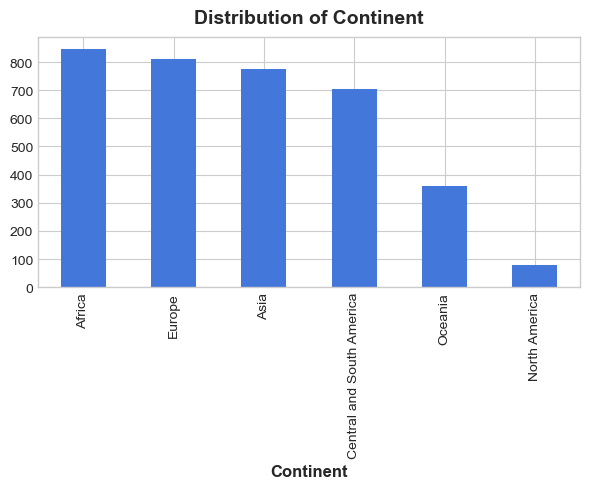

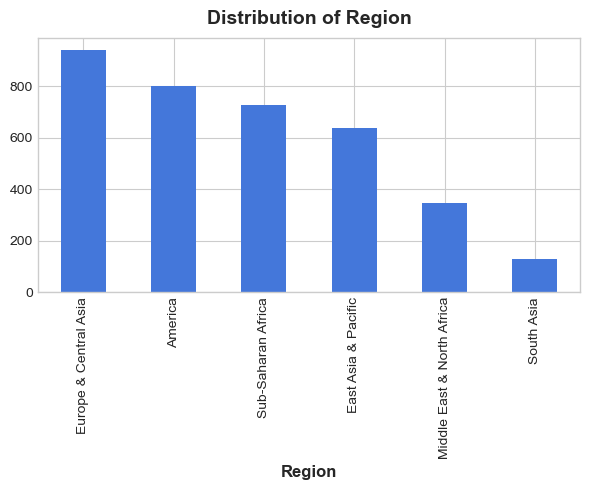

In [13]:
def plot_bar(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,5), dpi=100)
        ax = fig.gca()
        counts = df[col].value_counts()
        counts.plot.bar(ax = ax,color= "#4477DA")
        ax.set_title("Distribution of " + col)
        ax.set_xlabel(col)
        
        plt.show() 
#cat_cols =['Continent', 'Region']
plot_bar(df, categorical_variables)

In [14]:
num = df[numeric_variables]

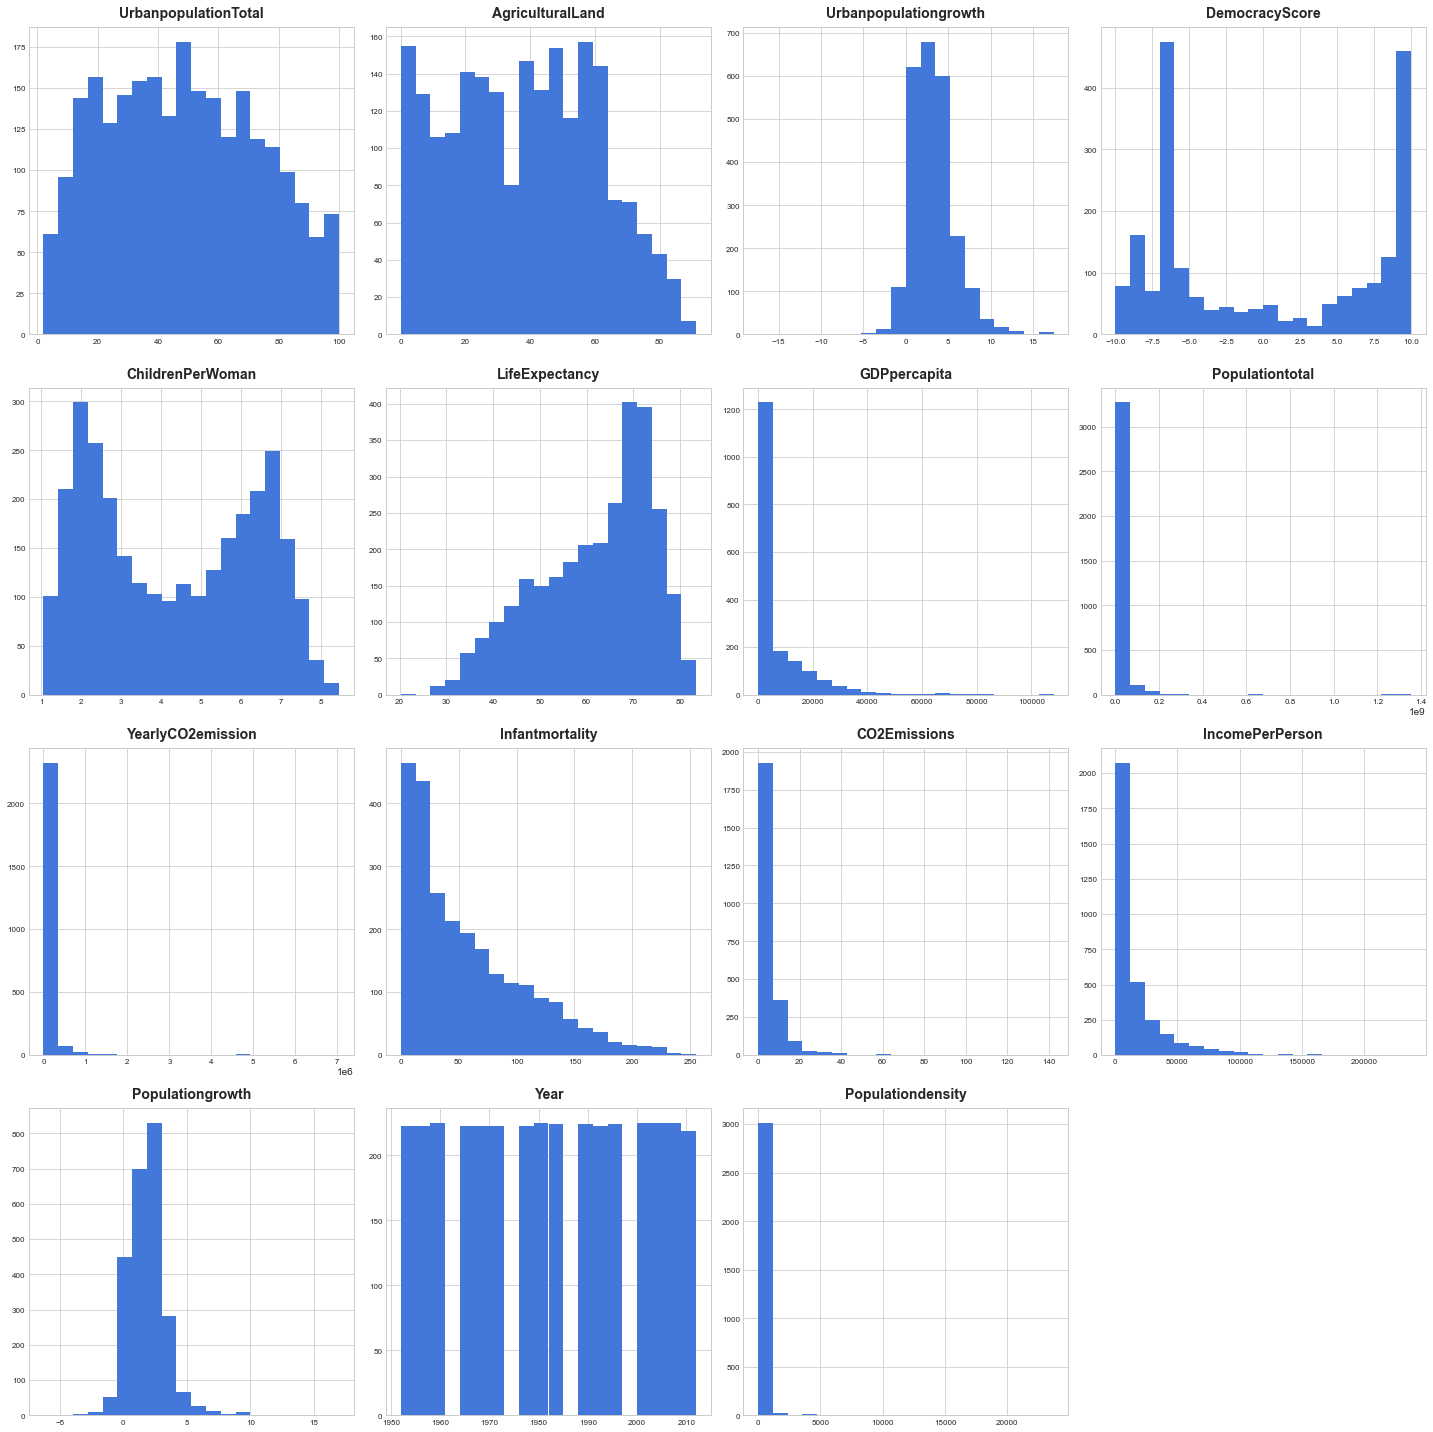

In [15]:
num.hist(figsize=(20, 20), bins=20, xlabelsize=8, ylabelsize=8,color = "#4477DA");

## Correlation

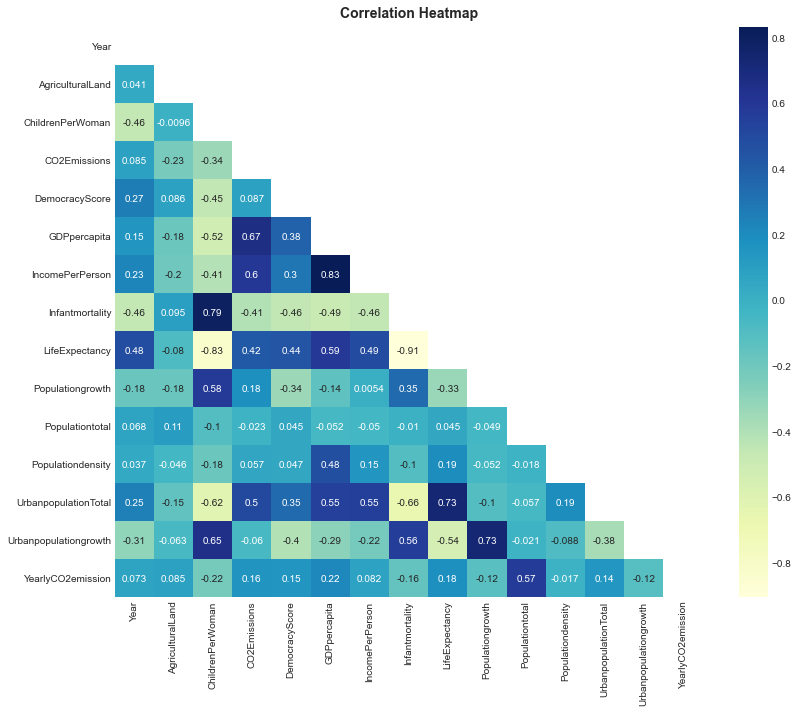

In [19]:
# Plot correlation heatmap
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [19]:
def plot_scatter(df, cols, col_y = "LifeExpectancy"):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.scatterplot(x=col, y=col_y, data=df, ax=axes[i])
        axes[i].set_title("Scatter plot of " + col_y + " vs. " + col)

    plt.tight_layout()
    plt.show()


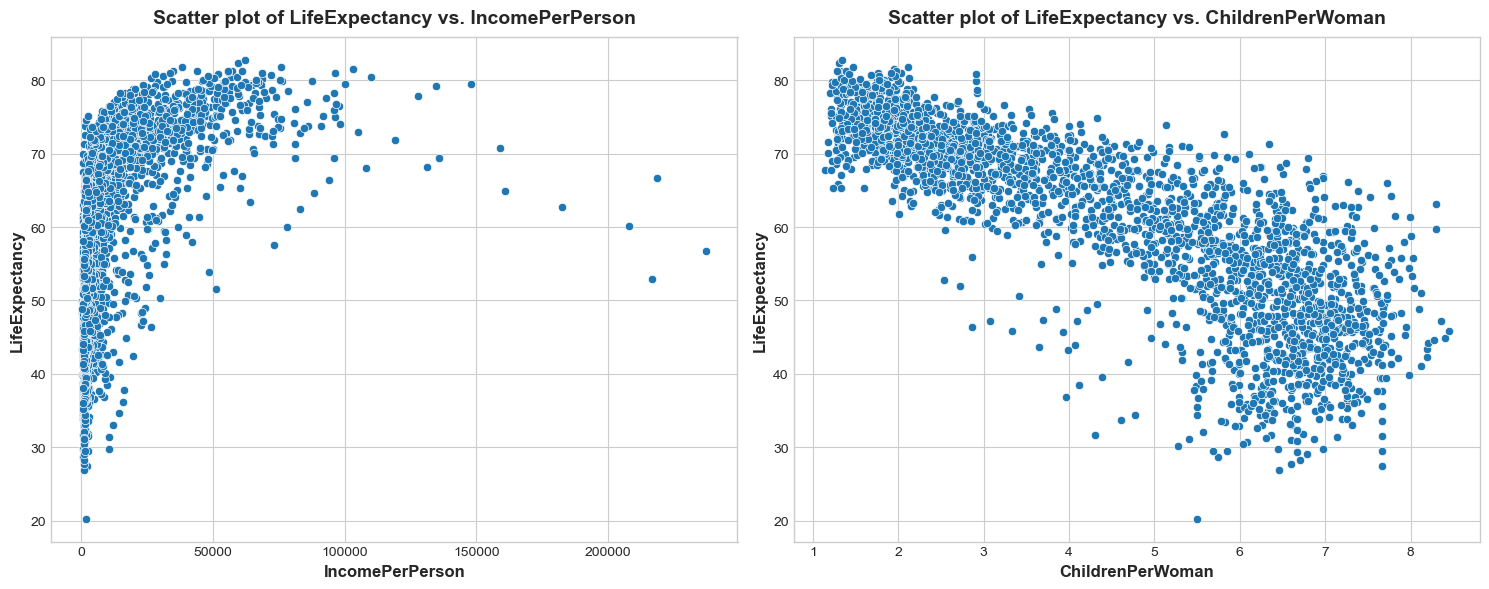

In [20]:
num_cols = ['IncomePerPerson','ChildrenPerWoman']
plot_scatter(df,num_cols )

## Data Preprocessing - Log transformation

In [10]:
skew_limit = 0.75
print("data set skewness")
print(df.skew())
print("__"*20)
print("Columns need transformation")
log_columns = df.skew().sort_values(ascending = False)
log_columns = log_columns.loc[log_columns.abs() > 0.75]
print(log_columns)
# Perform log transgormation
for log in log_columns.index:
    df[log] = np.log1p(df[log])
print("__"*20)
print("Transformation done")   
    



data set skewness
Year                     -0.001986
AgriculturalLand          0.087735
ChildrenPerWoman          0.094851
CO2Emissions              4.660367
DemocracyScore            0.193574
GDPpercapita              2.261607
IncomePerPerson           3.726847
Infantmortality           1.009623
LifeExpectancy           -0.602426
Populationgrowth          1.959970
Populationtotal           9.369833
Populationdensity        11.761015
UrbanpopulationTotal      0.173723
Urbanpopulationgrowth     0.752592
YearlyCO2emission         9.180500
dtype: float64
________________________________________
Columns need transformation
Populationdensity        11.761015
Populationtotal           9.369833
YearlyCO2emission         9.180500
CO2Emissions              4.660367
IncomePerPerson           3.726847
GDPpercapita              2.261607
Populationgrowth          1.959970
Infantmortality           1.009623
Urbanpopulationgrowth     0.752592
dtype: float64
________________________________________
Tr

### Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split


# Separate target from predictors
y = df.LifeExpectancy
X = df.drop(['LifeExpectancy'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

- Imputes missing values in **_numerical_** data, and
- Imputes missing values and applies ordinal encoding to **_categorical_** data.

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [13]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scaler', StandardScaler())
                             ])
# process the train and test data (all features)
X_train_pre = pipeline.fit_transform(X_train)
X_valid_pre = pipeline.transform(X_valid)

In [14]:
X_train = pd.DataFrame(data = X_train_pre,  columns = X_train.columns)
X_valid = pd.DataFrame(data = X_valid_pre,  columns = X_valid.columns)

In [15]:
X_train = X_train.round()
X_train.head()

,Continent,Region,Year,AgriculturalLand,ChildrenPerWoman,CO2Emissions,DemocracyScore,GDPpercapita,IncomePerPerson,Infantmortality,Populationgrowth,Populationtotal,Populationdensity,UrbanpopulationTotal,Urbanpopulationgrowth,YearlyCO2emission
0,0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,1.0,0.0,-1.0,-0.0,-1.0,1.0,-1.0,-1.0,1.0
1,-2.0,-0.0,1.0,-1.0,-1.0,0.0,-0.0,-0.0,0.0,-0.0,-1.0,-0.0,-0.0,-1.0,0.0,-1.0
2,-0.0,-2.0,1.0,-1.0,0.0,-0.0,-1.0,0.0,1.0,-2.0,-1.0,-1.0,1.0,-2.0,2.0,-1.0
3,-0.0,2.0,1.0,-1.0,-2.0,-1.0,-0.0,1.0,1.0,-1.0,-0.0,-1.0,1.0,-1.0,-1.0,1.0
4,1.0,-0.0,1.0,-1.0,0.0,-1.0,-2.0,1.0,1.0,0.0,-1.0,-1.0,-1.0,-0.0,-1.0,1.0


In [16]:
X_valid = X_valid.round()
X_valid.head()

,Continent,Region,Year,AgriculturalLand,ChildrenPerWoman,CO2Emissions,DemocracyScore,GDPpercapita,IncomePerPerson,Infantmortality,Populationgrowth,Populationtotal,Populationdensity,UrbanpopulationTotal,Urbanpopulationgrowth,YearlyCO2emission
0,0.0,0.0,1.0,-0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-2.0,-1.0,0.0,-0.0,-1.0,1.0
1,-1.0,-0.0,0.0,-0.0,-1.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,-2.0,-0.0,-0.0,1.0,2.0,0.0,1.0,-0.0,0.0,-0.0,-1.0,-0.0,-0.0,0.0,2.0,-1.0
3,-1.0,-0.0,1.0,-1.0,-1.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-1.0,0.0,-1.0
4,2.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-1.0,1.0


## Modelling

### Helper Functions

In [27]:
def residuals_plot(y_pred):
    '''
    1) Ploting scatter plot
    2) Plotting histogram'''
    
    resids = np.subtract(y_valid,y_pred)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Sxatter plot
    ax[0] = sns.regplot(y_pred,resids, fit_reg = False, ax=ax[0])
    ax[0].set_xlabel('Residual values')
    ax[0].set_ylabel('Count')
    ax[0].set_title('Scatter of residuals')

    # Right: Histogram
    ax[1] = sns.distplot(resids, ax=ax[1])
    ax[1].set_xlabel('Residual values')
    ax[1].set_ylabel('Count')
    ax[1].set_title('Histogram of residuals')
    plt.show()

## Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#Create a Randomodelm Forest Classifier object
baseline = RandomForestRegressor(n_estimators = 100, random_state=0)

# Train the classifier



rfc = baseline.fit(X_train, y_train)
# Make predictions
yhat_train1 = rfc.predict(X_train)
yhat_valid1 = rfc.predict(X_valid)


#Evaluate the model using r2 and mean squared
train_mse = mean_squared_error(y_train, yhat_train1)
valid_mse = mean_squared_error(y_valid, yhat_valid1)
train_r2 = r2_score(y_train, yhat_train1)
valid_r2 = r2_score(y_valid, yhat_valid1)
#Print the evaluation metrics
print("Train MSE:           ",train_mse)
print("valid MSE:            ",valid_mse)
print("Train R_Squareg:     ",train_r2)
print("valid R_Squared:      ",valid_r2 )

Train MSE:            2.1038797899808883
valid MSE:             13.47855255816349
Train R_Squareg:      0.9863395213173709
valid R_Squared:       0.9098531186040418


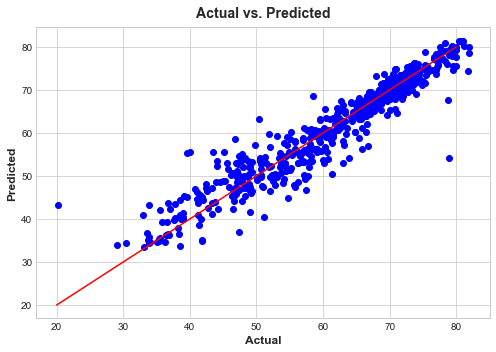

In [32]:
# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=( 7,5))
plt.scatter(y_valid, yhat_valid1, color='b')
plt.plot(np.array([20,80]), np.array([20,80]), color='red')
plt.title('Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

## Linear Regression

In [23]:
lre=LinearRegression()
### training -fitting- the model
lre.fit(X_train, y_train)
yhat_train2 = lre.predict(X_train)
yhat_valid2 = lre.predict(X_valid)

#Evaluate the model using r2 and mean squared
train_mse = mean_squared_error(y_train, yhat_train2)
valid_mse = mean_squared_error(y_valid, yhat_valid2)
train_r2 = r2_score(y_train, yhat_train2)
valid_r2 = r2_score(y_valid, yhat_valid2)
#Print the evaluation metrics
print("Train MSE:           ",train_mse)
print("valid MSE:            ",valid_mse)
print("Train R_Squareg:     ",train_r2)
print("valid R_Squared:      ",valid_r2 )

Train MSE:            28.966450622134484
valid MSE:             28.597372736996377
Train R_Squareg:      0.8119210122557954
valid R_Squared:       0.8087358447998456


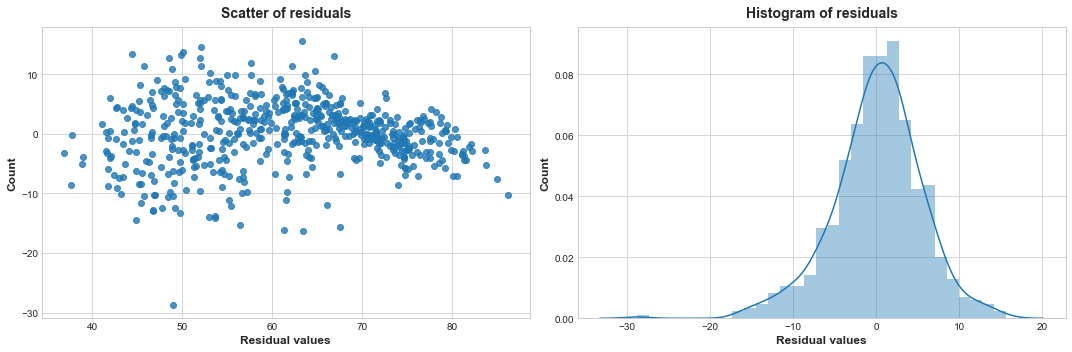

In [28]:
residuals_plot(yhat_valid2)

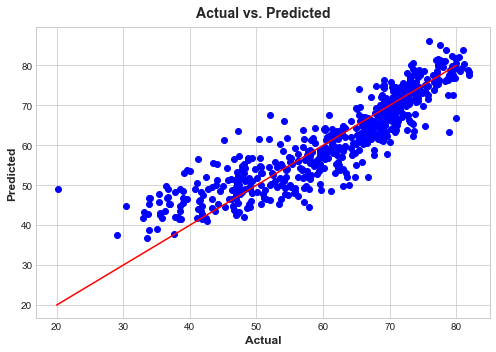

In [33]:
# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=( 7,5))
plt.scatter(y_valid, yhat_valid2, color='b')
plt.plot(np.array([20,80]), np.array([20,80]), color='red')
plt.title('Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()